# Friendly Farmer


## Leaf_deceased_detection

In [1]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

import os

for fname in os.listdir('images/'):
  print(fname)

Deceased_Bacterial Blight
Deceased_Cercospora Leaf Spot
Deceased_Anthracnose
Deceased_Alternaria Alternata
Healthy_Leaves


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
data_dir = os.path.join('images')

In [3]:
data_dir

'images'

In [4]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [5]:
folder_count = len(glob('images/*'))
print(folder_count)

5


In [6]:
IMG_HIEGHT = 256
IMG_WIDHT = 256

In [7]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)

In [8]:
train_data_gen = image_gen_train.flow_from_directory(directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 105 images belonging to 5 classes.


In [9]:
train_data_gen.class_indices

{'Deceased_Alternaria Alternata': 0,
 'Deceased_Anthracnose': 1,
 'Deceased_Bacterial Blight': 2,
 'Deceased_Cercospora Leaf Spot': 3,
 'Healthy_Leaves': 4}

In [10]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [11]:
val_data_gen = image_gen_val.flow_from_directory(directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 26 images belonging to 5 classes.


In [12]:
sample_data, label = next(train_data_gen)

/home/rishi/anaconda3/envs/Data_Science/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


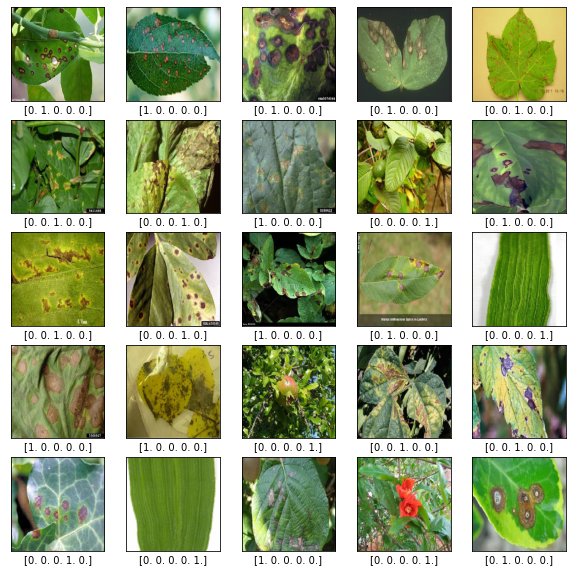

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

In [14]:
classes = ['Deceased_Alternaria Alternata','Deceased_Anthracnose','Deceased_Bacterial Blight','Deceased_Cercospora Leaf Spot','Healthy_Leaves']

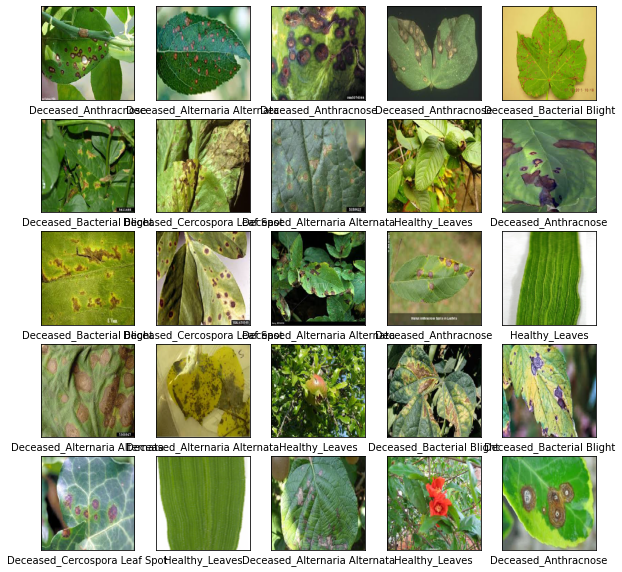

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(label[i])])
plt.show()

# VGG16

In [16]:
IMAGE_SIZE = [256,256]

In [17]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [18]:
for layer in vgg.layers:
    layer.trainable = False

In [19]:
x = Flatten()(vgg.output)

In [20]:
prediction = Dense(5,activation='softmax')(x)

In [21]:
model = Model(inputs=vgg.input,outputs=prediction)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit_generator(train_data_gen,
                             validation_data=val_data_gen,
                             epochs=5)

Epoch 1/5
4/4 [==============================] - 53s 13s/step - loss: 0.2150 - accuracy: 0.9333 - val_loss: 2.5616 - val_accuracy: 0.1154
Epoch 2/5
4/4 [==============================] - 53s 13s/step - loss: 0.2159 - accuracy: 0.9048 - val_loss: 2.1551 - val_accuracy: 0.2692
Epoch 3/5
4/4 [==============================] - 53s 13s/step - loss: 0.0696 - accuracy: 0.9810 - val_loss: 1.8571 - val_accuracy: 0.3077
Epoch 4/5
4/4 [==============================] - 54s 13s/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 2.3373 - val_accuracy: 0.3846
Epoch 5/5
4/4 [==============================] - 54s 13s/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 2.4909 - val_accuracy: 0.4231


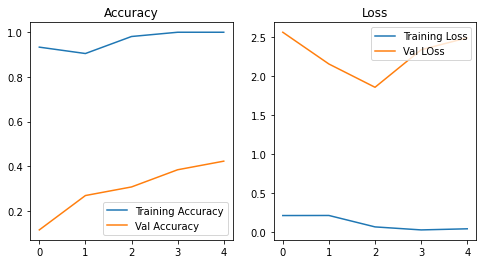

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [27]:
tf.keras.models.save_model(model,"leaf_deceased_detecion.hdf5")

In [54]:
image_1 = load_img('/home/rishi/Desktop/hl.jpeg', target_size=(256,256))

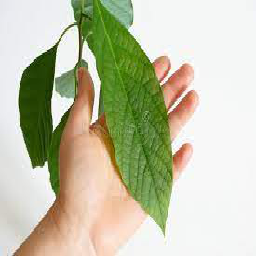

In [55]:
image_1

In [56]:
data_1 = img_to_array(image_1)
img_test = data_1.reshape(1,256,256,3)

In [57]:
pred = model.predict(img_test)

In [58]:
pred.round(2)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [59]:
c

['Deceased_Alternaria Alternata',
 'Deceased_Anthracnose',
 'Deceased_Bacterial Blight',
 'Deceased_Cercospora Leaf Spot',
 'Healthy_Leaves']

In [60]:
np.argmax(pred)

4

In [61]:
print(classes[(np.argmax(pred))])

Healthy_Leaves
